In [2]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 


In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [4]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [5]:


data = []
paths = []
result = []

for r, d, f in os.walk(r'datadata/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:


paths = []
for r, d, f in os.walk(r"datadata/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [13]:
result = np.array(result)
result = result.reshape((2891,2))

In [14]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics= ["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [17]:
model.get_weights()

[array([[[[ 0.01720138, -0.12419555, -0.1930406 ,  0.1852475 ,
           -0.12508082,  0.18902828, -0.09531677,  0.13094093,
           -0.13431706, -0.13495529, -0.08206782,  0.19926934,
            0.08672123, -0.14375034, -0.05327833,  0.10250841,
            0.12010811,  0.07038017,  0.17476274,  0.04481028,
           -0.12857413,  0.07013081, -0.20354897, -0.18737955,
            0.01144977, -0.1437994 , -0.05583395,  0.12857832,
            0.04213858,  0.0246345 ,  0.17981781,  0.18617223],
          [ 0.03117952,  0.10607494, -0.00913855,  0.19233172,
            0.20091633, -0.12843904, -0.0849532 ,  0.07775395,
            0.12531783, -0.20412186, -0.01988296,  0.12382044,
           -0.01865366,  0.05201863,  0.12650917, -0.02066888,
            0.03042805, -0.0901799 , -0.07349969,  0.06505509,
           -0.11144269,  0.05318563,  0.08288808, -0.19339226,
            0.15184759, -0.16679314,  0.17677556, -0.10386225,
            0.00769921,  0.0307166 , -0.12390192, -0.1

In [18]:
y_train.shape

(2312, 2)

In [21]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/50
58/58 [==============================] - 69s 1s/step - loss: 0.1457 - accuracy: 0.9485 - val_loss: 0.4880 - val_accuracy: 0.9033
Epoch 2/50
58/58 [==============================] - 73s 1s/step - loss: 0.0929 - accuracy: 0.9706 - val_loss: 0.5707 - val_accuracy: 0.9171
Epoch 3/50
58/58 [==============================] - 81s 1s/step - loss: 0.0891 - accuracy: 0.9719 - val_loss: 0.6024 - val_accuracy: 0.9154
Epoch 4/50
58/58 [==============================] - 80s 1s/step - loss: 0.0762 - accuracy: 0.9736 - val_loss: 0.6082 - val_accuracy: 0.9240
Epoch 5/50
58/58 [==============================] - 73s 1s/step - loss: 0.0563 - accuracy: 0.9853 - val_loss: 0.5929 - val_accuracy: 0.9292
Epoch 6/50
58/58 [==============================] - 72s 1s/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.6234 - val_accuracy: 0.9378
Epoch 7/50
58/58 [==============================] - 73s 1s/step - loss: 0.0345 - accuracy: 0.9844 - val_loss: 0.6041 - val_accuracy: 0.9326
Epoch 8/50
58/58 [==

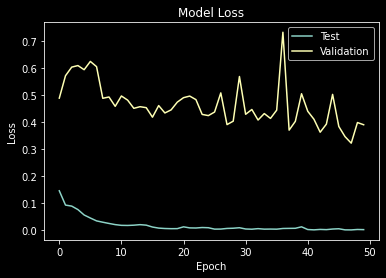

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

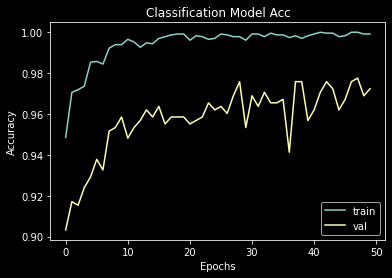

In [23]:
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.title("Classification Model Acc");
plt.ylabel("Accuracy");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);
plt.show()

In [24]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.99998807907104% Confidence Its a Tumor


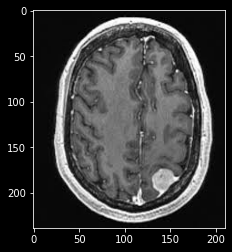

In [32]:
from matplotlib.pyplot import imshow
img = Image.open(r"datadata/mridownkkk.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape((1,128,128,3))
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))


In [33]:
from matplotlib.pyplot import imshow
img = Image.open(r"datadata/patient2.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99898672103882% Confidence This Is Its a Tumor


99.99935626983643% Confidence Its a Tumor


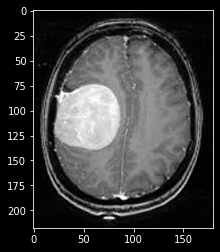

In [38]:
from matplotlib.pyplot import imshow
img = Image.open(r"datadata/tymri
                 .jpg")
x = np.array(img.resize((128,128)))
x = x.reshape((1,128,128,3))
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

In [31]:
model.save('BrainTumorBTCS_CNN_DL_model.h5')

In [34]:
path = "savemodel/BrainTumorBTCS_CNN_DL_model_1.h5"

In [35]:
model.save(path)

In [38]:
from tensorflow.keras.models import load_model
lo_model=load_model('savemodel/BrainTumorBTCS_CNN_DL_model_1.h5')


In [42]:
lo_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

In [43]:
lo_model.get_weights()

[array([[[[-1.68054104e-01,  1.75463725e-02, -7.84551874e-02,
            2.35064868e-02,  5.71185388e-02, -9.21214223e-02,
           -8.04969743e-02,  8.74421969e-02, -1.94735914e-01,
           -4.81183715e-02, -4.01363745e-02,  1.11243166e-01,
           -5.96915185e-02, -6.48687109e-02, -1.09429426e-01,
           -5.76591417e-02,  3.13637108e-02, -1.52076915e-01,
           -4.70470637e-03,  7.38974214e-02, -2.83741951e-02,
           -1.37465239e-01,  1.09628096e-01,  3.40849087e-02,
            6.31679874e-03,  4.10495773e-02,  4.97515388e-02,
           -1.83819339e-01, -1.96176946e-01,  7.92290866e-02,
            1.79221511e-01,  4.39053550e-02],
          [ 7.59305730e-02, -9.44788978e-02, -1.35451585e-01,
           -3.68289649e-02, -1.23406611e-02,  9.84628946e-02,
            9.95370746e-02, -1.54919535e-01, -5.66636212e-02,
           -1.05698332e-01,  7.30572045e-02, -1.45442886e-04,
           -1.67336762e-01, -7.29155317e-02,  1.65847108e-01,
            5.49306162e-

100.0% Confidence This Is No, Its not a tumor


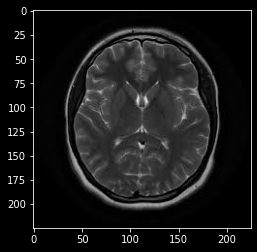

In [45]:
from matplotlib.pyplot import imshow
img = Image.open(r"predict/tymri.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))